In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('flipkart_com-ecommerce_sample.csv')

In [3]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


# Understanding the structure of data


In [4]:
df.describe()

,retail_price,discounted_price
count,19922.000000,19922.000000
mean,2979.206104,1973.401767
std,9009.639341,7333.586040
min,35.000000,35.000000
25%,666.000000,350.000000
50%,1040.000000,550.000000
75%,1999.000000,999.000000
max,571230.000000,571230.000000


In [5]:
#Number of unique brands
print(df['brand'].nunique())

3499


# Analyzing textual data


In [6]:
from collections import Counter
import matplotlib.pyplot as plt

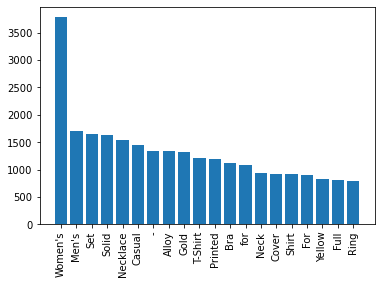

In [7]:
# Word frequency in product names
product_names = ' '.join(df['product_name'].fillna('')).split()
common_words = Counter(product_names).most_common(20)
words, counts = zip(*common_words)
plt.bar(words, counts)
plt.xticks(rotation=90)
plt.show()

## we can clearly observe that most products belong to Women's category

# Handling Missing values

In [8]:
df.isnull().sum()

uniq_id                       2
crawl_timestamp               2
product_url                   2
product_name                  2
product_category_tree         2
pid                           2
retail_price                 80
discounted_price             80
image                         5
is_FK_Advantage_product       2
description                   4
product_rating                2
overall_rating                2
brand                      5866
product_specifications       16
dtype: int64

In [9]:
df['brand'].fillna('', inplace=True) # handling null values where brand name is not provided

In [10]:
df.isnull().sum()

uniq_id                     2
crawl_timestamp             2
product_url                 2
product_name                2
product_category_tree       2
pid                         2
retail_price               80
discounted_price           80
image                       5
is_FK_Advantage_product     2
description                 4
product_rating              2
overall_rating              2
brand                       0
product_specifications     16
dtype: int64

# Handling Duplicates

In [11]:
df.duplicated().sum()


1

In [12]:
df.drop_duplicates(inplace=True)

# Handling Outliers


C:\Users\aatma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


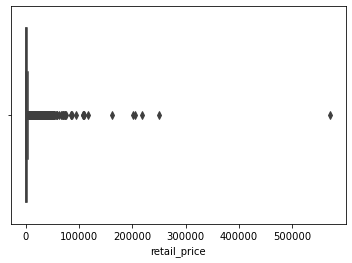

                                uniq_id            crawl_timestamp  \
1      7f7036a6d550aaa89d34c77bd39a5e48  2016-03-25 22:59:23 +0000   
7      8542703ca9e6ebdf6d742638dfb1f2ca  2016-03-25 22:59:23 +0000   
16     849ab05698081a374215d0b7d18047d0  2016-03-25 22:59:23 +0000   
19     7ee3e337474a29b38cfe1f5d4020d633  2016-03-25 22:59:23 +0000   
42     f5b22eaa5f79e67209612997f4aa215d  2016-05-26 06:31:26 +0000   
...                                 ...                        ...   
19952  0bacd4a00919e53fafc0b57769a3be42  2015-12-01 10:15:43 +0000   
19956  b5d944972c751ab3f9b95f106fd52f50  2015-12-01 10:15:43 +0000   
19970  43c9e22c8e9d67c0ef63f6b2d11671d7  2015-12-01 10:15:43 +0000   
19974  b90031c6daba26d176aeda12eb3960d3  2015-12-01 10:15:43 +0000   
19982  40a11fee08863edbbc3c2a03d0528bf4  2015-12-01 10:15:43 +0000   

                                             product_url  \
1      http://www.flipkart.com/fabhomedecor-fabric-do...   
7      http://www.flipkart.com/fabhomed

In [14]:
# Box plot to identify outliers in retail prices
import seaborn as sns
sns.boxplot(df['retail_price'])
plt.show()

# Filter potential outliers
Q1 = df['retail_price'].quantile(0.25)
Q3 = df['retail_price'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['retail_price'] < (Q1 - 1.5 * IQR)) | (df['retail_price'] > (Q3 + 1.5 * IQR))]
print(outliers)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20001 entries, 0 to 20000
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  object 
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    20001 non-null  object 
 14  product_specifications

# Using the TF-IDF Approach

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Combine 'product_name' and 'description' into a single text field
df['combined_text'] = df['product_name'].fillna('') + " " + df['description'].fillna('')

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform the combined text to generate the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_text'])

def search_products(query, tfidf_vectorizer, tfidf_matrix, df, top_n=5):
    # Convert the search query to a vector
    query_vec = tfidf_vectorizer.transform([query])
    
    # Calculate cosine similarity between the query and all product vectors
    cosine_similarities = cosine_similarity(query_vec, tfidf_matrix).flatten()
    
    # Get the top N most similar products
    top_indices = cosine_similarities.argsort()[-top_n:][::-1]
    
    # Retrieve the corresponding products from the dataframe
    top_products = df.iloc[top_indices][['product_name', 'description', 'product_url']]
    top_similarities = cosine_similarities[top_indices]
    
    return top_products, top_similarities

# Example search query
query = "women watch"
top_products, top_similarities = search_products(query, tfidf_vectorizer, tfidf_matrix, df)

# Display the results
print(top_products)
print("Similarities:", top_similarities)


                                           product_name  \
8712           Stylisda SFK09 Analog Watch  - For Women   
14808           Q&Q DA37J504Y Analog Watch  - For Women   
8620   Logues LGSWATCHES760SL Analog Watch  - For Women   
9057    Logues LGSWATCH3136SL Analog Watch  - For Women   
8539      Now B140-SRR12 Analog Watch  - For Men, Women   

                                             description  \
8712   Stylisda SFK09 Analog Watch  - For Women - Buy...   
14808  Q&Q DA37J504Y Analog Watch  - For Women - Buy ...   
8620   Logues LGSWATCHES760SL Analog Watch  - For Wom...   
9057   Logues LGSWATCH3136SL Analog Watch  - For Wome...   
8539   Now B140-SRR12 Analog Watch  - For Men, Women ...   

                                             product_url  
8712   http://www.flipkart.com/stylisda-sfk09-analog-...  
14808  http://www.flipkart.com/q-q-da37j504y-analog-w...  
8620   http://www.flipkart.com/logues-lgswatches760sl...  
9057   http://www.flipkart.com/logues-lgswatch31

# Using Bert embeddings

In [ ]:
import torch
from transformers import BertModel, BertTokenizer
from sklearn.metrics.pairwise import cosine_similarity


# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to encode a sentence into a BERT embedding
def encode_text(text, model, tokenizer):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze()

# Encode all product descriptions
df['bert_embedding'] = df['combined_text'].apply(lambda x: encode_text(x, model, tokenizer).numpy())

# Function to search for similar products
def search_products(query, model, tokenizer, df, top_n=5):
    # Encode the search query
    query_embedding = encode_text(query, model, tokenizer).numpy().reshape(1, -1)
    
    # Compute cosine similarity between the query and all product embeddings
    doc_embeddings = np.stack(df['bert_embedding'].values)
    cosine_similarities = cosine_similarity(query_embedding, doc_embeddings).flatten()
    
    # Get the top N most similar products
    top_indices = cosine_similarities.argsort()[-top_n:][::-1]
    
    # Retrieve the corresponding products from the dataframe
    top_products = df.iloc[top_indices][['product_name', 'description', 'product_url']]
    top_similarities = cosine_similarities[top_indices]
    
    return top_products, top_similarities

# Example search query
query = "women's cycling shorts"
top_products, top_similarities = search_products(query, model, tokenizer, df)

# Display the results
print(top_products)
print("Similarities:", top_similarities)


# Using Doc2Vec

In [21]:

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
# Load the dataset


# Preprocess the text data (tokenization)
df['tokens'] = df['combined_text'].apply(lambda x: x.split())

# Create TaggedDocument objects for training
documents = [TaggedDocument(words=text, tags=[str(i)]) for i, text in enumerate(df['tokens'])]

# Train a Doc2Vec model
doc2vec_model = Doc2Vec(vector_size=100, window=5, min_count=2, workers=4, epochs=40)
doc2vec_model.build_vocab(documents)
doc2vec_model.train(documents, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

# Function to search for similar products
def search_products(query, model, df, top_n=5):
    # Preprocess and vectorize the query
    query_tokens = query.split()
    query_vector = model.infer_vector(query_tokens)
    
    # Calculate cosine similarity between the query vector and all product vectors
    doc_vectors = np.array([model.dv[str(i)] for i in range(len(df))])
    cosine_similarities = cosine_similarity([query_vector], doc_vectors).flatten()
    
    # Get the top N most similar products
    top_indices = cosine_similarities.argsort()[-top_n:][::-1]
    
    # Retrieve the corresponding products from the dataframe
    top_products = df.iloc[top_indices][['product_name', 'description', 'product_url']]
    top_similarities = cosine_similarities[top_indices]
    
    return top_products, top_similarities

# Example search query
query = "men shirt blue"
top_products, top_similarities = search_products(query, doc2vec_model, df)

# Display the results
print(top_products)
print("Similarities:", top_similarities)


                                     product_name  \
4643    Allure Auto CM 1696 Car Mat Toyota Innova   
17185  TheLostPuppy Back Cover for Apple iPad Air   
17437  TheLostPuppy Back Cover for Apple iPad Air   
11108                  DeStudio Tiny Wall Sticker   
4828      Allure Auto CM 1902 Car Mat Hyundai i20   

                                             description  \
4643   Buy Allure Auto CM 1696 Car Mat Toyota Innova ...   
17185  TheLostPuppy Back Cover for Apple iPad Air (Mu...   
17437  TheLostPuppy Back Cover for Apple iPad Air (Mu...   
11108  Buy DeStudio Tiny Wall Sticker for Rs.399 onli...   
4828   Buy Allure Auto CM 1902 Car Mat Hyundai i20 fo...   

                                             product_url  
4643   http://www.flipkart.com/allure-auto-cm-1696-ca...  
17185  http://www.flipkart.com/thelostpuppy-back-cove...  
17437  http://www.flipkart.com/thelostpuppy-back-cove...  
11108  http://www.flipkart.com/destudio-tiny-wall-sti...  
4828   http://www.flipkar